# The _EUV Snapshot Imaging Spectrograph_

_Roy T. Smart, Charles C. Kankelborg, and Jacob D. Parker_

In [1]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import astropy.units as u
import pandas
import IPython.display
from kgpy import vector, optics, format as fmt
import esis

In [3]:
warnings.filterwarnings('ignore')
pandas.set_option('display.max_colwidth', -1)

In [4]:
esis_optics_small = esis.optics.design.final(
    pupil_samples=1, 
    field_samples=5,
    all_channels=False,
)
%time rays_small = esis_optics_small.rays_output

Wall time: 454 ms


In [5]:
esis_optics = esis.optics.design.final(
    pupil_samples=21, 
    field_samples=21,
    all_channels=False
)
%time rays = esis_optics.rays_output

Wall time: 30.3 s


## Optical Layout

<IPython.core.display.Javascript object>


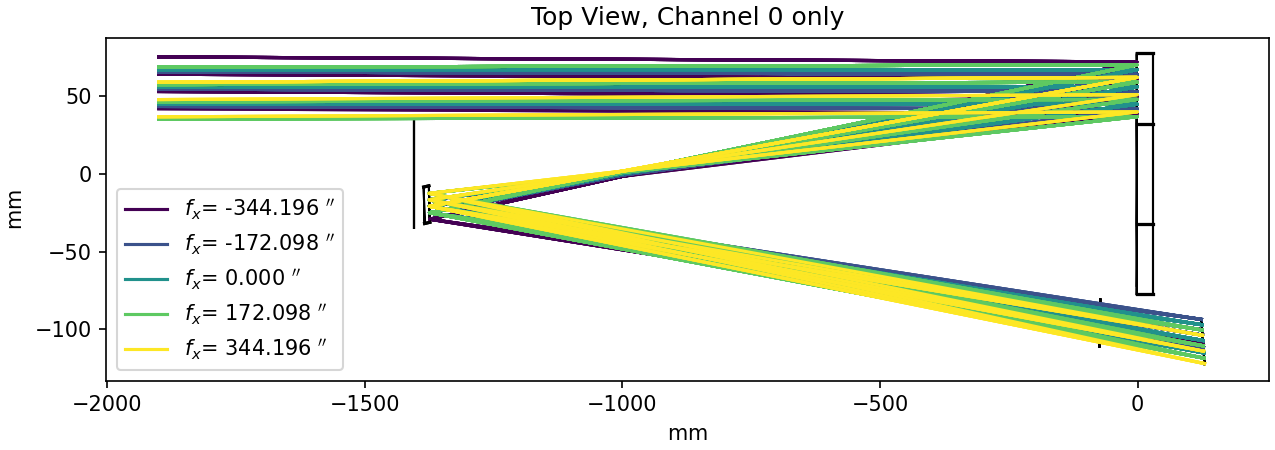

<IPython.core.display.Javascript object>


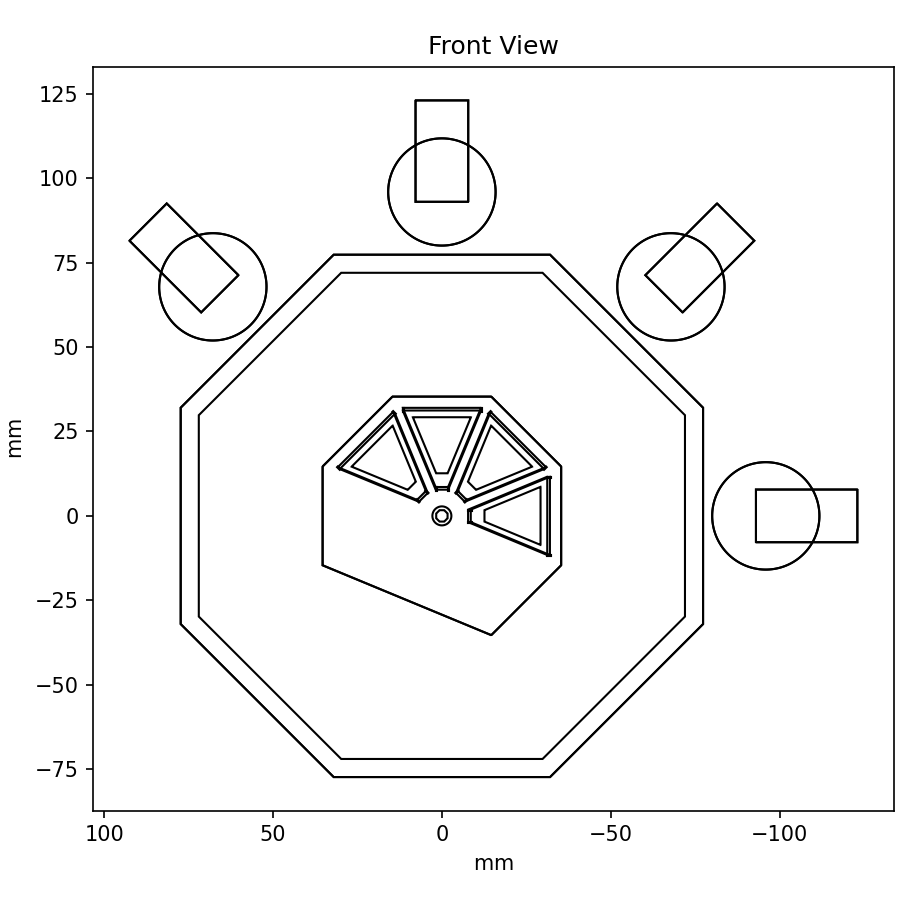

In [6]:
color_axis = optics.rays.Rays.axis.field_x
fig_layout, ax_layout = plt.subplots(figsize=(8.5, 3), constrained_layout=True)
esis.optics.design.final(field_samples=5, pupil_samples=5, all_channels=False).system.plot(
    ax=ax_layout, 
    components=(vector.iz, vector.ix),
    color_axis=color_axis,
)
_ = ax_layout.set_title('Top View, Channel 0 only')

fig_bore, ax_bore = plt.subplots(figsize=(6, 6), constrained_layout=True)
ax_bore.invert_xaxis()
esis.optics.design.final().system.plot(
    ax=ax_bore, 
    plot_rays=False,
)
_ = ax_bore.set_title('Front View')
ax_bore.set_aspect('equal')

## Point-spread Function

In [7]:
%%time
rays_psf = esis.optics.design.final(
    pupil_samples=101, 
    field_samples=5,
    all_channels=False
).rays_output

Wall time: 40.8 s


<IPython.core.display.Javascript object>


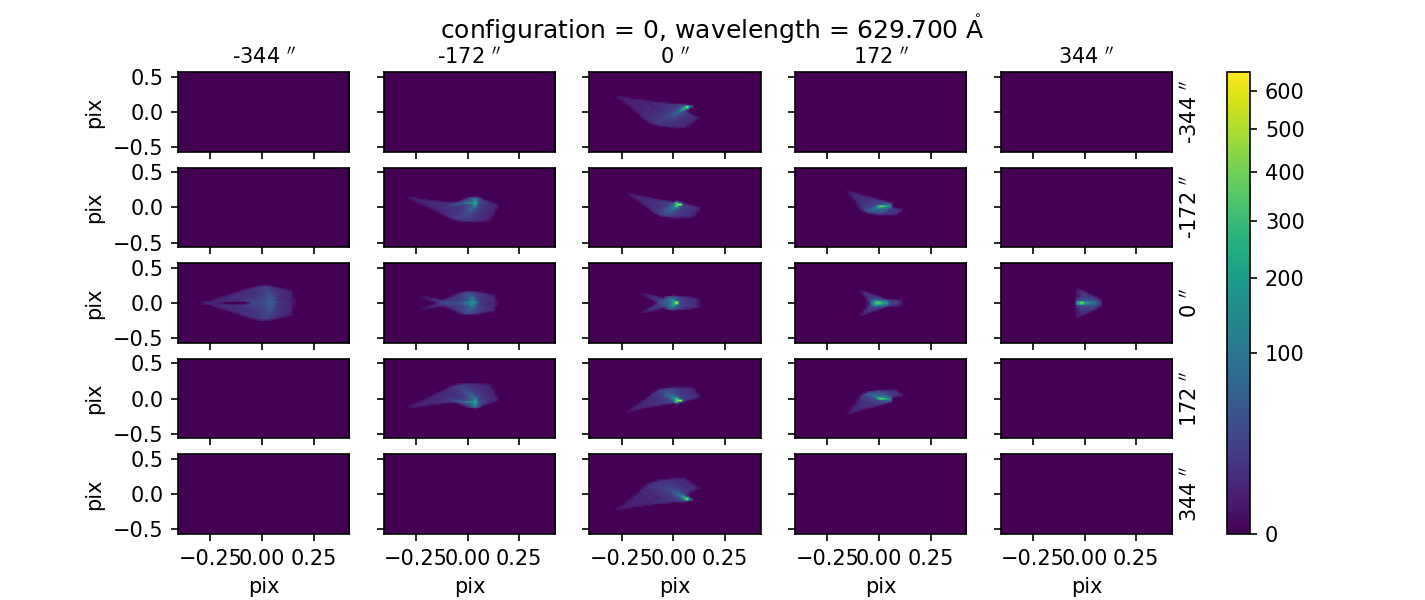

<IPython.core.display.Javascript object>


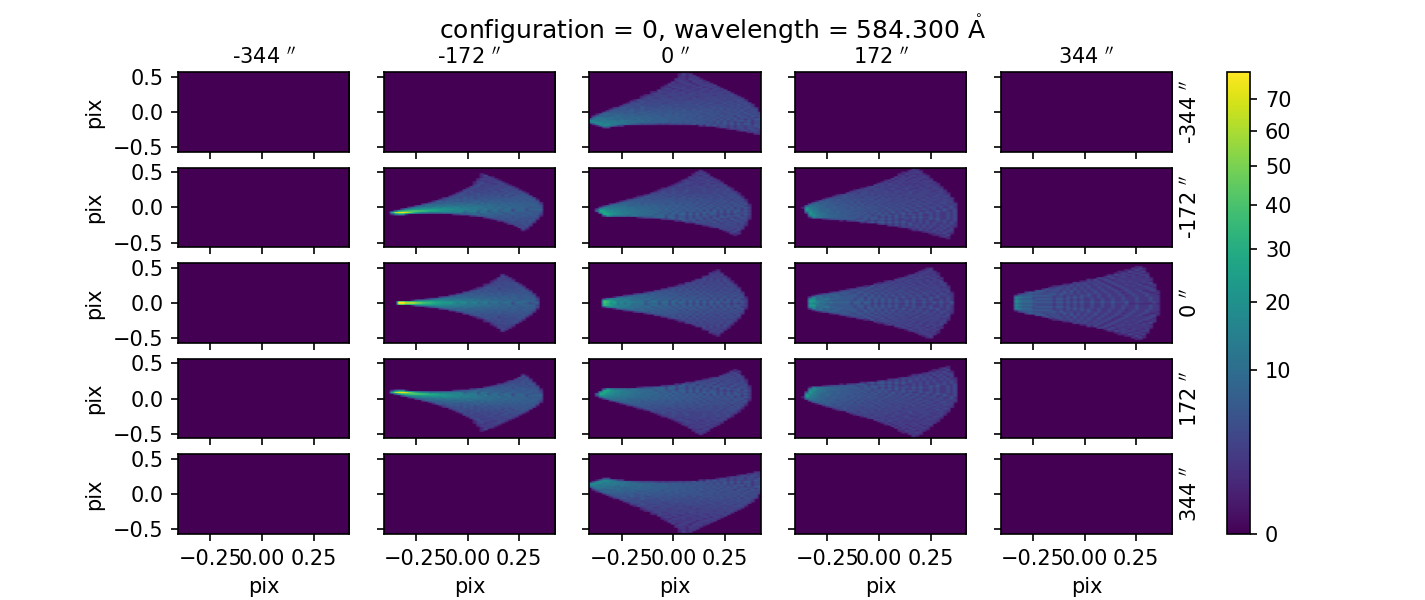

In [8]:
bins = rays_psf.input_pupil_x.shape[~0] // 2

fig_630 = rays_psf.plot_pupil_hist2d_vs_field(wavlen_index=~0, norm=matplotlib.colors.PowerNorm(1/2), bins=bins, )
fig_630.set_figheight(4)
fig_630.set_figwidth(9.5)

fig_584 = rays_psf.plot_pupil_hist2d_vs_field(wavlen_index=0, norm=matplotlib.colors.PowerNorm(1/2), bins=bins, )
fig_584.set_figheight(4)
fig_584.set_figwidth(9.5)

<IPython.core.display.Javascript object>


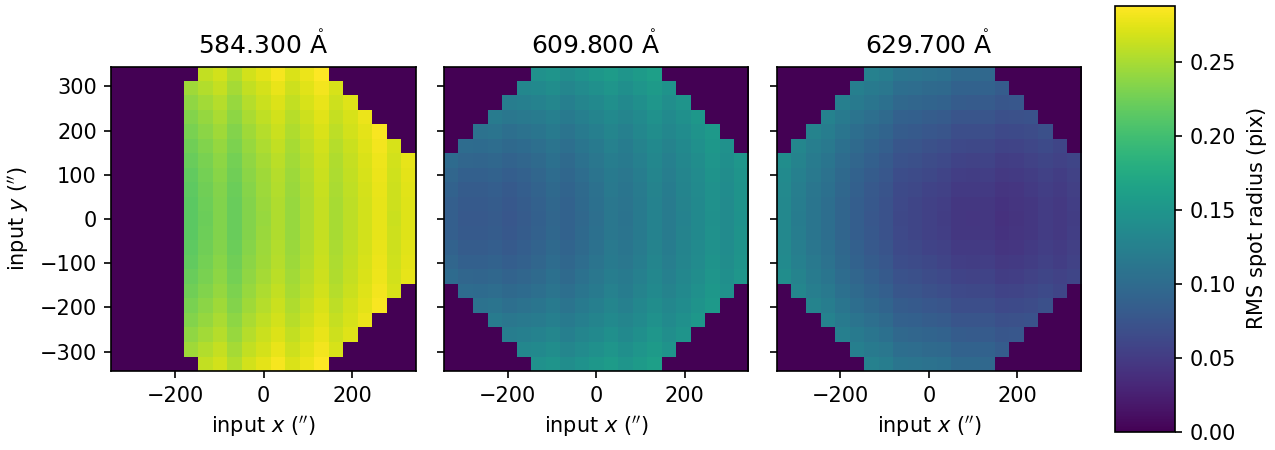

In [9]:
fig_sz, axs_sz = plt.subplots(ncols=3, figsize=(8.5, 3), sharex=True, sharey=True, constrained_layout=True)
_ = rays.plot_spot_size_vs_field(axs=axs_sz)

## Vignetting

In [10]:
vignetting_linear = rays.vignetting(polynomial_degree=1)
vignetting_linear.model().dataframe

$C_{   }$                              $C_{\lambda   }$  \
$V$  77.593 $\mathrm{\%}$  1.043e-05 $\mathrm{\frac{\%}{\mathring{A}}}$   

                                             $C_{ x  }$  \
$V$  -5.163e-02 $\mathrm{\frac{\%}{{}^{\prime\prime}}}$   

                                            $C_{  y }$  
$V$  3.228e-17 $\mathrm{\frac{\%}{{}^{\prime\prime}}}$

In [11]:
vignetting_quadratic = rays.vignetting(polynomial_degree=2)
vignetting_quadratic.model().dataframe

$C_{   }$                               $C_{\lambda   }$  \
$V$  81.929 $\mathrm{\%}$  -1.425e-02 $\mathrm{\frac{\%}{\mathring{A}}}$   

                                             $C_{ x  }$  \
$V$  -4.880e-02 $\mathrm{\frac{\%}{{}^{\prime\prime}}}$   

                                            $C_{  y }$  \
$V$  6.392e-16 $\mathrm{\frac{\%}{{}^{\prime\prime}}}$   

                              $C_{\lambda\lambda   }$  \
$V$  1.149e-05 $\mathrm{\frac{\%}{\mathring{A}^{2}}}$   

                                                    $C_{\lambda x  }$  \
$V$  -4.719e-06 $\mathrm{\frac{\%}{\mathring{A}\,{}^{\prime\prime}}}$   

                                    $C_{ xx  }$  \
$V$  2.195e-06 $\mathrm{\frac{\%}{arcsec^{2}}}$   

                                                   $C_{\lambda  y }$  \
$V$  1.743e-17 $\mathrm{\frac{\%}{\mathring{A}\,{}^{\prime\prime}}}$   

                                    $C_{ x y }$  \
$V$  9.851e-20 $\mathrm{\frac{\%}{arcsec^{2}}}$   

                                    $C_{  yy }$  
$V$  2.838e-07 $\mathrm{\frac{\%}{arcsec^{2}}}$

<IPython.core.display.Javascript object>


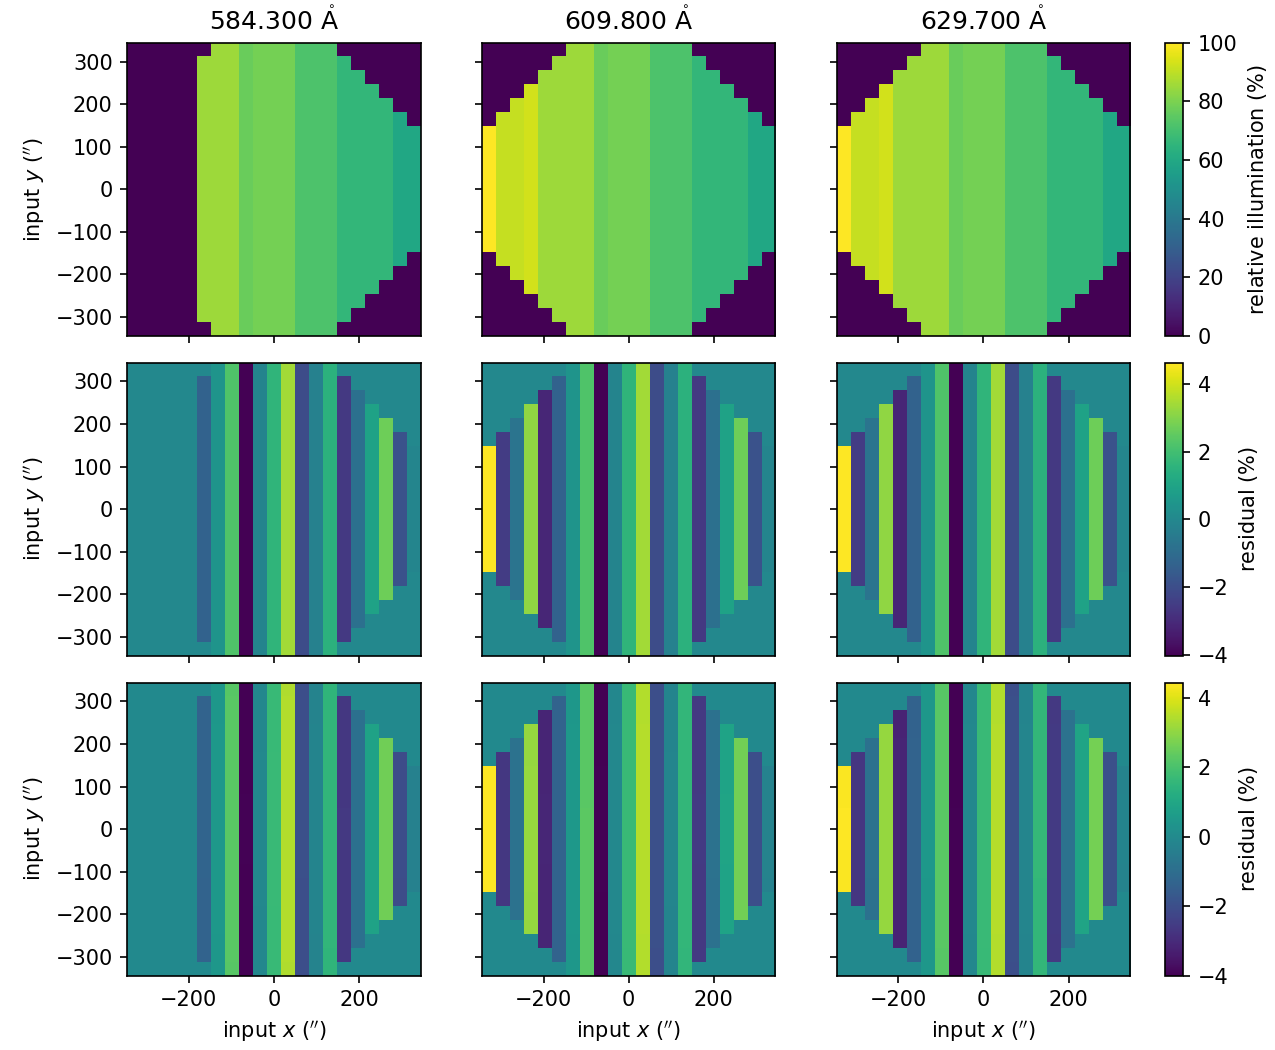

In [12]:
fig_vig, axs_vig = plt.subplots(nrows=3, ncols=3, figsize=(8.5, 7), sharex=True, sharey=True, constrained_layout=True)
_ = vignetting_linear.plot_unvignetted(axs=axs_vig[0], use_xlabels=False)
_ = vignetting_linear.plot_residual(axs=axs_vig[1], use_titles=False, use_xlabels=False)
_ = vignetting_quadratic.plot_residual(axs=axs_vig[2], use_titles=False)

## Distortion

In [13]:
distortion_linear = rays_small.distortion(polynomial_degree=1)
distortion_quadratic = rays_small.distortion(polynomial_degree=2)
distortion_large = rays.distortion()

In [14]:
distortion_quadratic.model().dataframe

$C_{   }$                            $C_{\lambda   }$  \
$x'$  -14692.062 $\mathrm{pix}$  24.177 $\mathrm{\frac{pix}{\mathring{A}}}$   
$y'$  520.000 $\mathrm{pix}$     -0.000 $\mathrm{\frac{pix}{\mathring{A}}}$   

                                           $C_{ x  }$  \
$x'$  1.208 $\mathrm{\frac{pix}{{}^{\prime\prime}}}$    
$y'$  -0.000 $\mathrm{\frac{pix}{{}^{\prime\prime}}}$   

                                           $C_{  y }$  \
$x'$  -0.000 $\mathrm{\frac{pix}{{}^{\prime\prime}}}$   
$y'$  -1.239 $\mathrm{\frac{pix}{{}^{\prime\prime}}}$   

                                $C_{\lambda\lambda   }$  \
$x'$  2.453e-03 $\mathrm{\frac{pix}{\mathring{A}^{2}}}$   
$y'$  2.996e-15 $\mathrm{\frac{pix}{\mathring{A}^{2}}}$   

                                                     $C_{\lambda x  }$  \
$x'$  2.453e-04 $\mathrm{\frac{pix}{\mathring{A}\,{}^{\prime\prime}}}$   
$y'$  1.932e-16 $\mathrm{\frac{pix}{\mathring{A}\,{}^{\prime\prime}}}$   

                                      $C_{ xx  }$  \
$x'$  7.065e-06 $\mathrm{\frac{pix}{arcsec^{2}}}$   
$y'$  2.453e-16 $\mathrm{\frac{pix}{arcsec^{2}}}$   

                                                      $C_{\lambda  y }$  \
$x'$  4.048e-14 $\mathrm{\frac{pix}{\mathring{A}\,{}^{\prime\prime}}}$    
$y'$  -9.375e-05 $\mathrm{\frac{pix}{\mathring{A}\,{}^{\prime\prime}}}$   

                                       $C_{ x y }$  \
$x'$  -1.268e-15 $\mathrm{\frac{pix}{arcsec^{2}}}$   
$y'$  -4.692e-06 $\mathrm{\frac{pix}{arcsec^{2}}}$   

                                      $C_{  yy }$  
$x'$  2.064e-06 $\mathrm{\frac{pix}{arcsec^{2}}}$  
$y'$  2.038e-15 $\mathrm{\frac{pix}{arcsec^{2}}}$

In [15]:
distortion_quadratic.model(inverse=True).dataframe

$C_{   }$  \
$x$  11402.696 $\mathrm{{}^{\prime\prime}}$   
$y$  402.142 $\mathrm{{}^{\prime\prime}}$     

                                              $C_{\lambda   }$  \
$x$  -19.704 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}}}$   
$y$  0.000 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}}}$     

                                         $C_{ x'  }$  \
$x$  0.730 $\mathrm{\frac{{}^{\prime\prime}}{pix}}$    
$y$  -0.001 $\mathrm{\frac{{}^{\prime\prime}}{pix}}$   

                                         $C_{  y' }$  \
$x$  0.001 $\mathrm{\frac{{}^{\prime\prime}}{pix}}$    
$y$  -0.773 $\mathrm{\frac{{}^{\prime\prime}}{pix}}$   

                                              $C_{\lambda\lambda   }$  \
$x$  -2.678e-04 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}^{2}}}$   
$y$  6.260e-14 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}^{2}}}$    

                                                    $C_{\lambda x'  }$  \
$x$  1.976e-05 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}\,pix}}$    
$y$  -5.462e-15 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}\,pix}}$   

                                               $C_{ x'x'  }$  \
$x$  -2.813e-06 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$   
$y$  9.056e-17 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$    

                                                    $C_{\lambda  y' }$  \
$x$  7.105e-15 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}\,pix}}$    
$y$  -7.083e-08 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}\,pix}}$   

                                              $C_{ x' y' }$  \
$x$  1.776e-15 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$   
$y$  2.058e-06 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$   

                                               $C_{  y'y' }$  
$x$  -9.032e-07 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$  
$y$  8.799e-16 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$

<IPython.core.display.Javascript object>


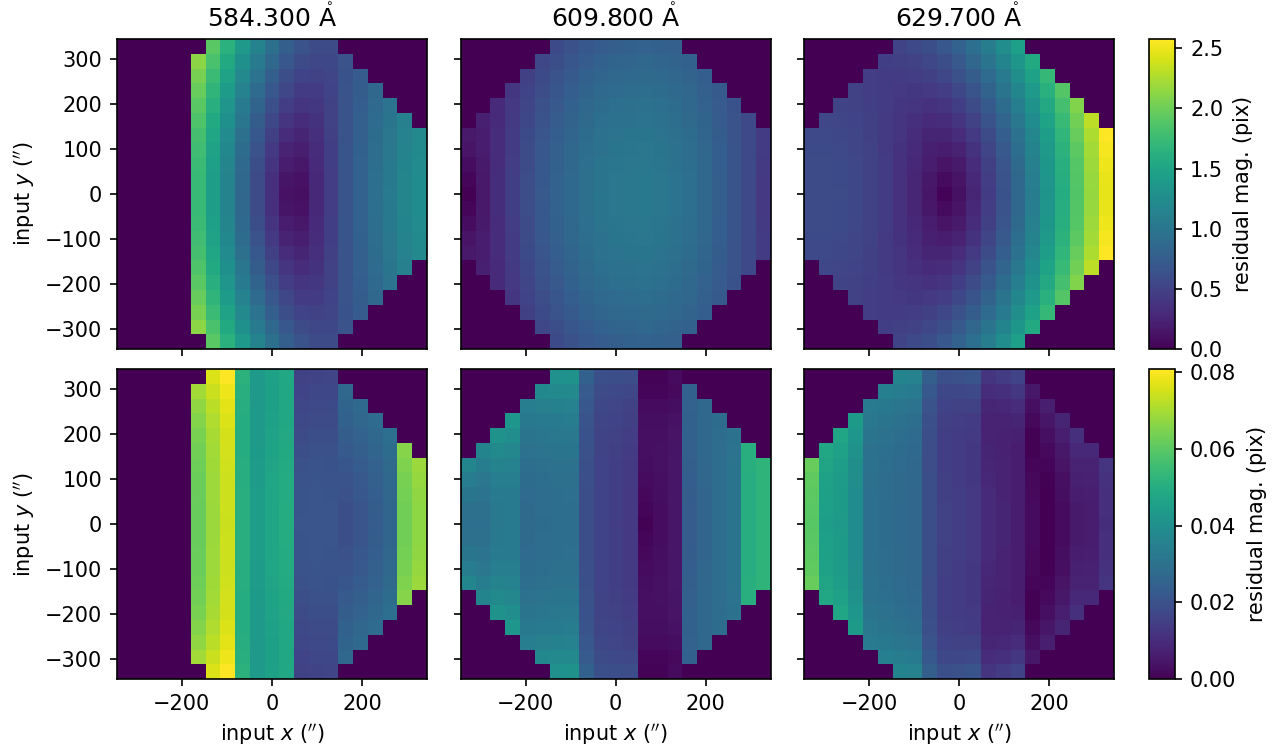

In [16]:
fig_dist_res, axs_dist_res = plt.subplots(nrows=2, ncols=3, figsize=(8.5, 5), sharex=True, sharey=True, constrained_layout=True)
_ = distortion_linear.plot_residual(axs=axs_dist_res[0], other=distortion_large, use_xlabels=False)
_ = distortion_quadratic.plot_residual(axs=axs_dist_res[1], other=distortion_large, use_titles=False)

## Level 0 Dataset

In [17]:
%time level_0 = esis.flight.level_0(caching=True)

Wall time: 26.7 s


<IPython.core.display.Javascript object>


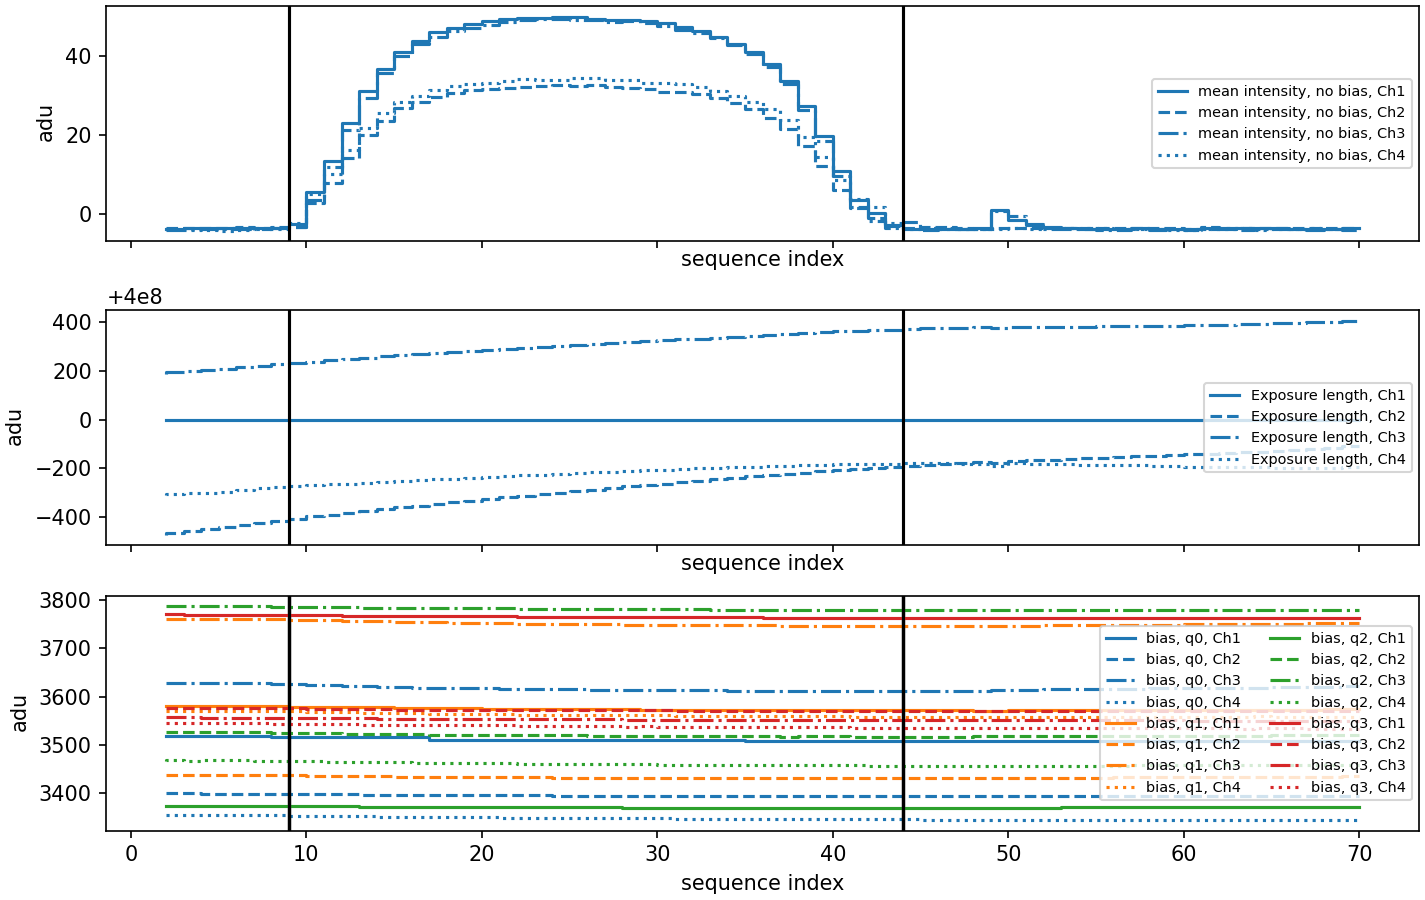

In [18]:
fig_lev0_vs_t, ax_lev0_vs_t = plt.subplots(nrows=3, figsize=(9.5, 6), sharex=True, constrained_layout=True)
_ = level_0.plot_exposure_stats_vs_index(ax_lev0_vs_t)

## Level 1 Dataset

<IPython.core.display.Javascript object>


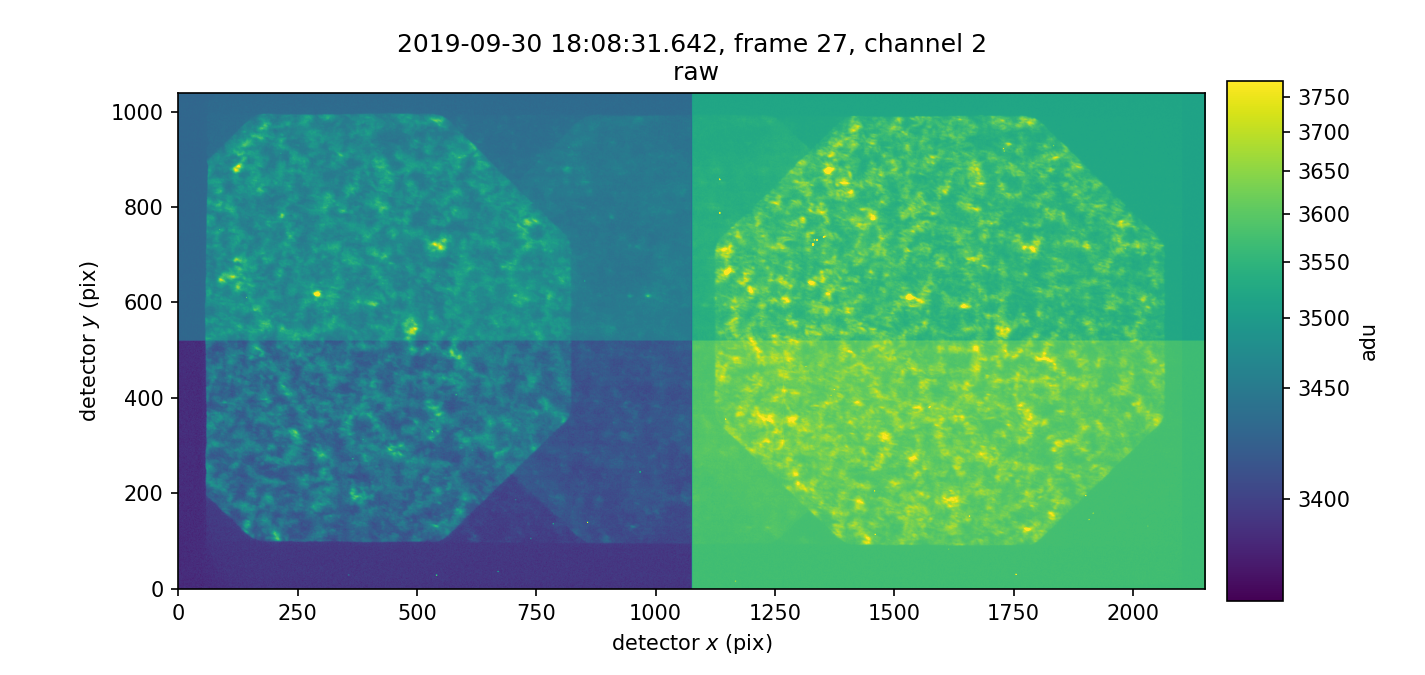

Wall time: 4.37 s


In [19]:
fig_lev0_blink, ax_lev0_blink = plt.subplots(figsize=(9.5, 4.5), constrained_layout=True)
%time _ = level_0.blink_intensity_nobias_nodark(ax=ax_lev0_blink, time_index=25, channel_index=1, norm_gamma=0.5)

<IPython.core.display.Javascript object>


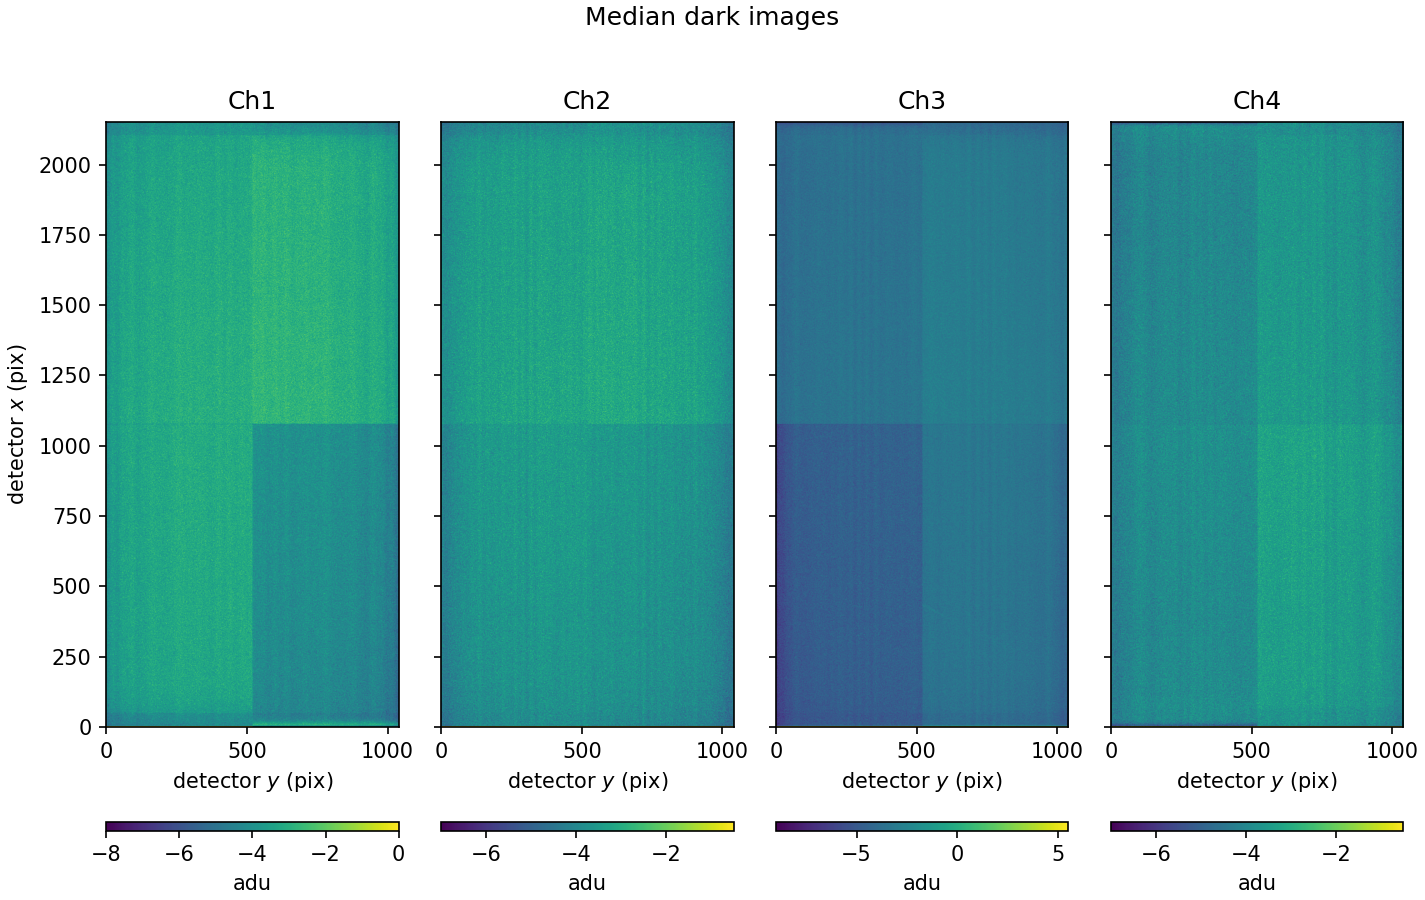

In [20]:
fig_dark, axs_dark = plt.subplots(ncols=4, figsize=(9.5, 6), sharex=True, sharey=True, constrained_layout=True)
_ = level_0.plot_dark(axs=axs_dark)

<IPython.core.display.Javascript object>


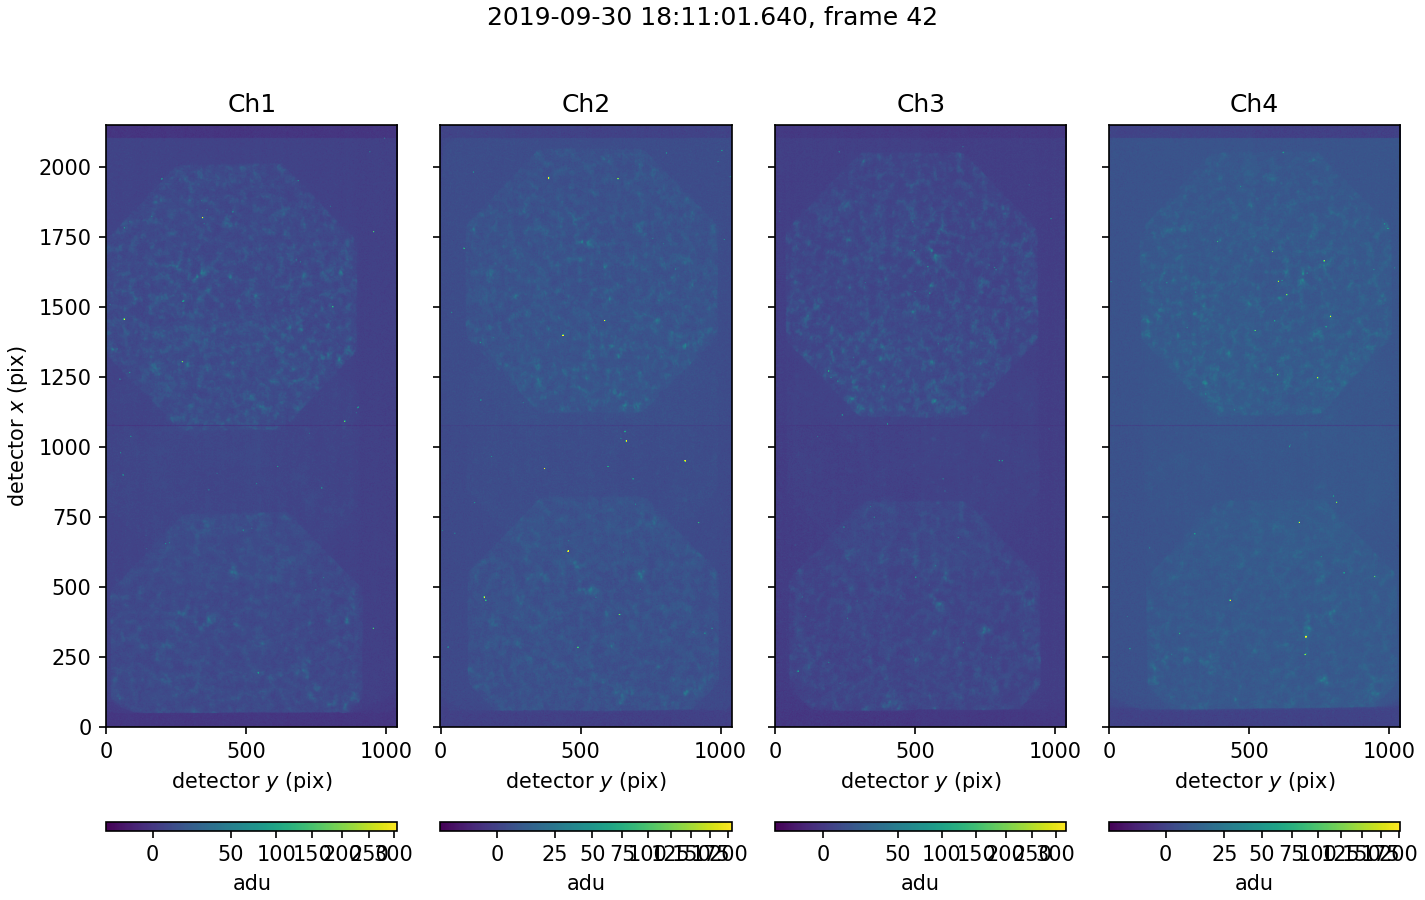

In [21]:
sl=level_0.signal_slice
fig_lev1, axs_lev1 = plt.subplots(ncols=4, figsize=(9.5, 6), sharex=True, sharey=True, constrained_layout=True, squeeze=False)
_ = level_0.animate(
    data=level_0.intensity_nobias_nodark, 
    time_slice=sl,
    axs=axs_lev1, 
    frame_interval=0.5 * u.s, 
    norm_gamma=0.5,
)

In [22]:
level_1 = esis.data.Level_1.from_level_0(level_0)

## Level 2 Dataset

In [23]:
esis_lev2 = esis.flight.optics.as_measured(field_samples=5, pupil_samples=10)

In [24]:
cube = level_1.intensity[17].copy()
cube = np.swapaxes(cube, ~1, ~0)
thresh = np.percentile(cube, 99)
cube[cube > thresh] = thresh
cube_mean = cube.mean((1, 2))[..., None, None]
cube = cube / cube_mean

In [25]:
# %time esis_fit2 = esis_lev2.fit_to_images(cube, global_samples=64)

In [26]:
# %time esis_fit3 = esis_lev2.fit_to_images(cube, global_search=False, local_samples=64)

In [27]:
# %time esis_fit4 = esis_fit3.fit_to_images(cube, global_search=False, local_samples=512)

<IPython.core.display.Javascript object>


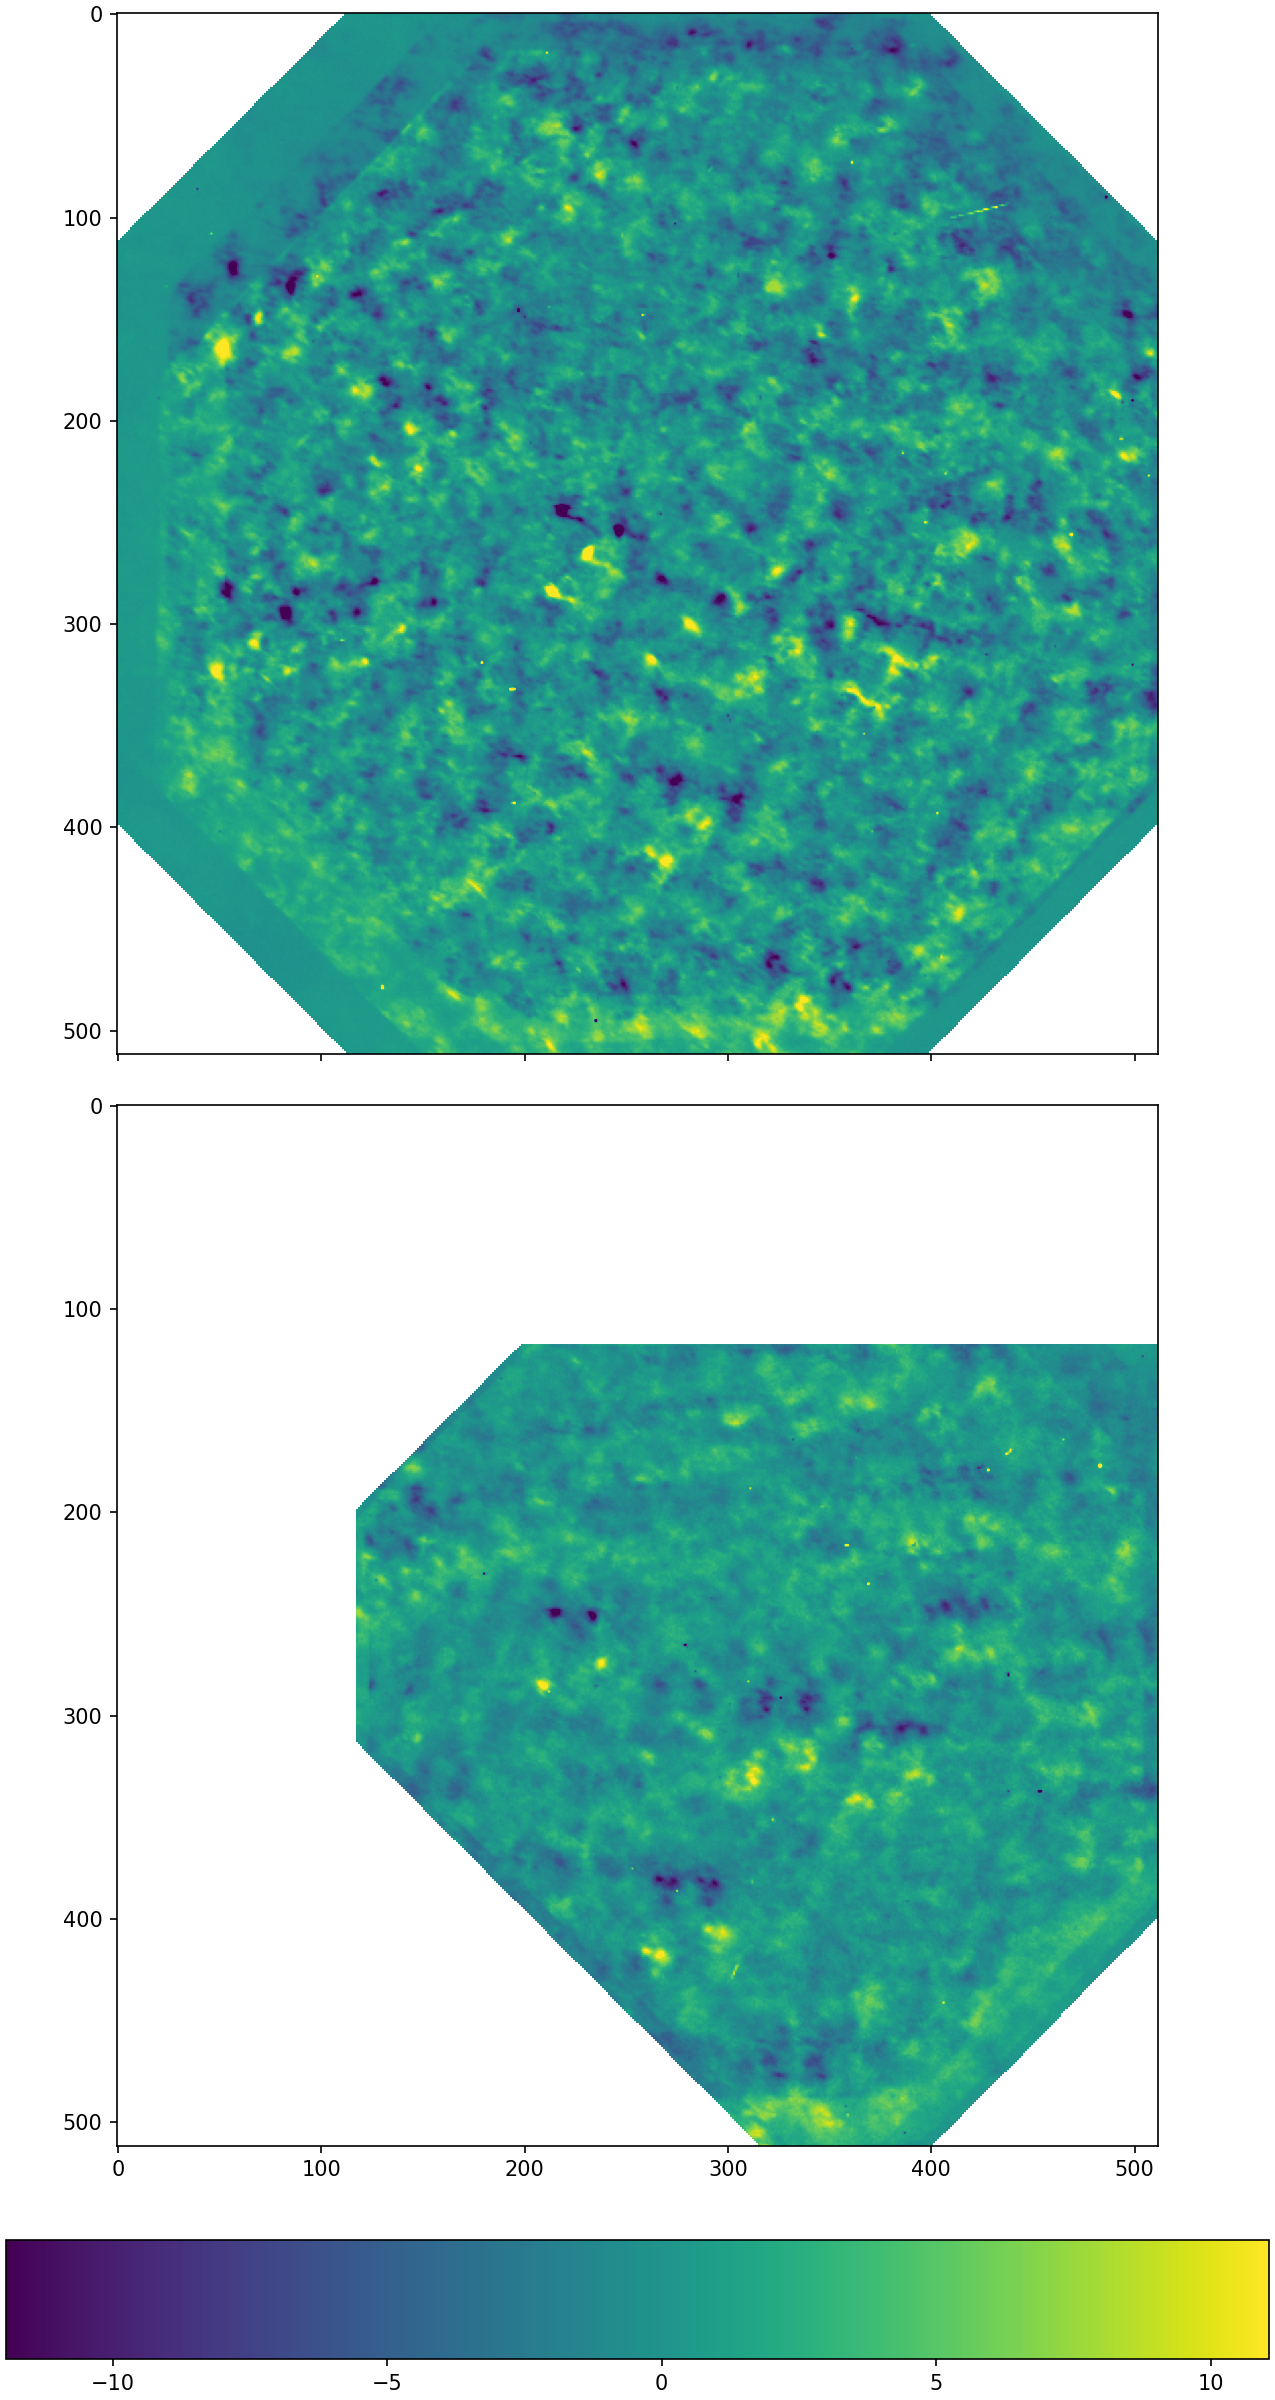

In [28]:
ef = esis_lev2.copy()
ef.pupil_samples=10

cube_test = level_1.intensity[15].copy()
cube_test = np.swapaxes(cube_test, ~1, ~0)
cube_test = cube_test / cube_mean
cube_test = np.broadcast_to(cube_test[:, None, ...], cube_test.shape[:1] + (3, ) + cube_test.shape[1:], subok=True)

distortion_fit = ef.rays_output.distortion(2)
domain=1.05*u.Quantity([ef.system.field_min, ef.system.field_max])
wavelength = distortion_fit.wavelength[..., 0, 0]
new_cube = distortion_fit.distort_cube(
    cube=cube_test,
    wavelength=wavelength,
    spatial_domain_output=domain,
    spatial_samples_output=512,
    inverse=True,
) 
vignetting = ef.rays_output.vignetting(polynomial_degree=1)
new_cube = vignetting(
    cube=new_cube,
    wavelength=wavelength,
    spatial_domain=domain,
    inverse=True,
).value

c0 = 2
c1 = 1


fig_sum, axs_sum = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(8.5, 16), constrained_layout=True)
# new_cube = new_cube / new_cube.nanmean((2,3), keepdims=True)
# new_cube_sum = new_cube[c1]
# new_cube_sum = new_cube[c1] - new_cube[c0]
new_cube_sum = new_cube[3] - new_cube[2] + new_cube[1] - new_cube[0]
# new_cube_sum = np.square(new_cube[1::2] - new_cube[::2]).mean((0, 1))
img_sum = axs_sum[0].imshow(
    new_cube_sum[~0], 
    vmax=np.nanpercentile(new_cube_sum, 99.9),
    vmin=np.nanpercentile(new_cube_sum, .1),
#     extent=domain.T.flatten()
)
img_sum = axs_sum[1].imshow(
    new_cube_sum[0], 
    vmax=np.nanpercentile(new_cube_sum, 99.9),
    vmin=np.nanpercentile(new_cube_sum, .1),
#     extent=domain.T.flatten()
)
fig_sum.colorbar(img_sum, ax=axs_sum, location='bottom')

In [29]:
from kgpy.plot import CubeSlicer

seq_test = level_1.intensity.copy()
seq_test = np.swapaxes(seq_test, ~1, ~0)
seq_test = seq_test / seq_test.mean((0, ~1, ~0))[..., None, None]
seq_test = np.broadcast_to(seq_test[:, :, None, ...], seq_test.shape[:2] + (3, ) + seq_test.shape[2:], subok=True)

distortion_fit = ef.rays_output.distortion(2)
domain=1.05*u.Quantity([ef.system.field_min, ef.system.field_max])
wavelength = distortion_fit.wavelength[None, ..., 0, 0]
new_seq = distortion_fit.distort_cube(
    cube=seq_test,
    wavelength=wavelength,
    spatial_domain_output=domain,
    spatial_samples_output=800,
    inverse=True,
) 
vignetting = ef.rays_output.vignetting(polynomial_degree=1)
new_seq = vignetting(
    cube=new_seq,
    wavelength=wavelength,
    spatial_domain=domain,
    inverse=True,
).value

<IPython.core.display.Javascript object>


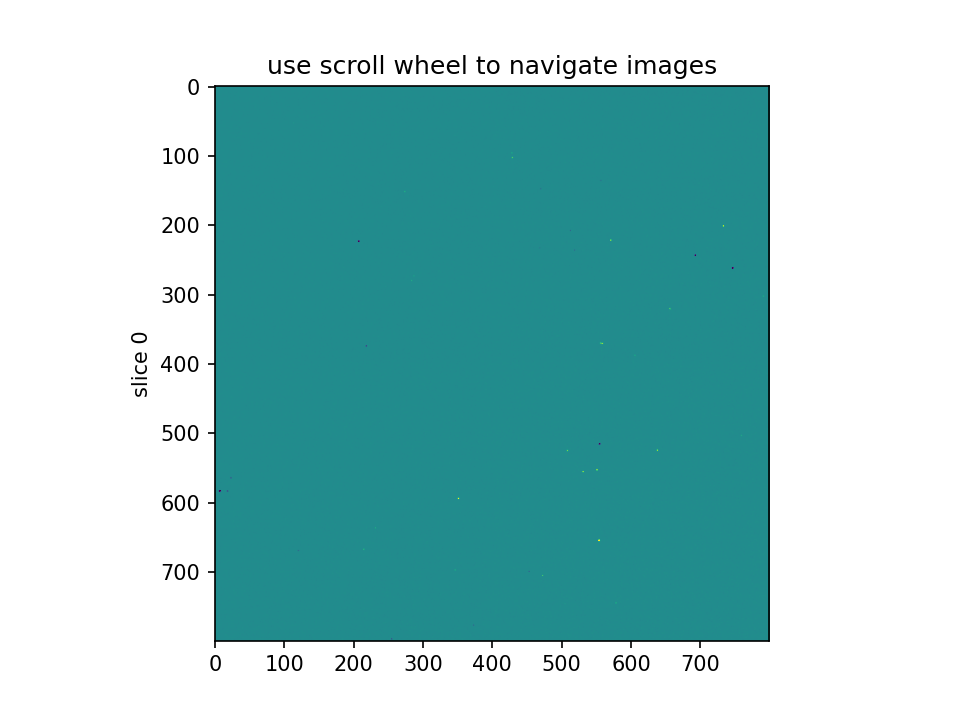

In [30]:
c0 = 0
c1 = 2
wavl_index = 2
new_seq_sum = new_seq[:, c1, wavl_index] - new_seq[:, c0, wavl_index]
# new_seq_sum = new_seq[:, 3, wavl_index] - new_seq[:, 2, wavl_index] + new_seq[:, 1, wavl_index] - new_seq[:, 0, wavl_index]

c = CubeSlicer(
    new_seq_sum, 
    vmin=np.nanpercentile(new_seq_sum, .1), 
    vmax=np.nanpercentile(new_seq_sum, 99.9),
)

```
grating.roll [-0.02586643  0.21234659  0.16095145  0.13050372] deg
grating.inclination [-4.45484664 -4.46149287 -4.484107   -4.48476027] deg
grating.twist [ 0.00798248 -0.01021617  0.00066178 -0.01059557] deg
detector.piston [-127.6637088  -128.63119666 -130.88297639 -125.74375295] mm
detector.inclination [-12.51931621 -11.9688824  -12.00861149 -12.15512299] deg
detector.roll [1.01144985 0.46819058 0.62082652 1.1089893 ] deg
detector.twist [0.05055503 0.10173027 0.00043038 0.05886743] deg
0.439088711237501


grating.roll [0.         0.08908043 0.00511388 0.13921534] deg
grating.inclination [-4.47904051 -4.45094923 -4.46688813 -4.46247686] deg
grating.twist [ 0.01951953 -0.00352658  0.0023002  -0.00670059] deg
detector.piston [-129.8097183  -125.35612751 -127.73389452 -123.00269436] mm
detector.inclination [-12.06616288 -12.13057324 -12.45703349 -12.57526062] deg
detector.roll [0.97807251 0.33781413 0.51888841 1.20731434] deg
detector.twist [ 0.03855981  0.11877061  0.06572041 -0.05612175] deg
grating.ruling_density [2589.82100721 2584.40017616 2586.85916354 2585.58658111] 1 / mm
0.4230704238387601

grating.roll [0.         0.08901151 0.00531376 0.13935632] deg
grating.inclination [-4.47904098 -4.45082869 -4.46667472 -4.46236351] deg
grating.twist [ 0.01952727 -0.00343817  0.00229413 -0.00681062] deg
detector.piston [-129.80972268 -125.35614593 -127.73392684 -123.00271084] mm
detector.inclination [-12.06619184 -12.13064032 -12.45703592 -12.57530472] deg
detector.roll [0.97805208 0.33785162 0.5188073  1.2072496 ] deg
detector.twist [ 0.03856756  0.11878306  0.06571999 -0.05612215] deg
grating.ruling_density [2589.82100674 2584.40019897 2586.85921695 2585.58660073] 1 / mm
0.421572868810082

grating.roll [-0.18339302  0.1912991  -0.24423213  0.14954592] deg
grating.inclination [-4.47421367 -4.46701968 -4.48000477 -4.47541185] deg
grating.twist [-0.00281387 -0.0004388  -0.01726725 -0.00022315] deg
detector.piston [-129.36034485 -125.05263026 -129.75106816 -126.29114561] mm
detector.inclination [-12.40328401 -12.18520951 -12.11054684 -12.32266505] deg
detector.roll [0.88960332 0.44721205 0.29551832 1.18532409] deg
detector.twist [-0.04311997 -0.15766523 -0.06604207 -0.02719837] deg
grating.ruling_density [2587.15655346 2590.49691119 2588.80168214 2587.9726245 ] 1 / mm
central_obsccuration.position_error [0. 0. 0.] mm
0.4176429781962918

grating.roll [-0.27050242  0.08649102 -0.35638329  0.00858951] deg
grating.inclination [-4.49153615 -4.46451952 -4.48236755 -4.46707009] deg
grating.twist [-0.01172079 -0.00156157 -0.01381602 -0.00151136] deg
detector.piston [-131.72925184 -124.90532615 -128.76531641 -127.87709699] mm
detector.inclination [-12.23621327 -12.74341056 -12.11964368 -12.13211684] deg
detector.roll [0.77967458 0.32198433 0.16798783 1.04178997] deg
detector.twist [-0.10461185  0.07054127 -0.13170127 -0.16336264] deg
grating.ruling_density [2588.55546956 2583.42925851 2589.72349727 2586.4546424 ] 1 / mm
vignetting.x [-2.37050659e-06  3.19605241e-08 -6.43114828e-06 -9.69131466e-06] 1 / (% arcsec)
vignetting.y [-1.90586609e-06  4.47393292e-06  1.99785986e-06  6.62994745e-07] 1 / (% arcsec)
0.39678974494263625

grating.roll [-0.24975095  0.14960186 -0.40976594  0.0604696 ] deg
grating.inclination [-4.49271078 -4.4687517  -4.46865727 -4.45834412] deg
grating.twist [-0.00154648  0.01425569 -0.0110846   0.00217384] deg
detector.piston [-129.37606249 -124.4913846  -128.59866586 -129.45683834] mm
detector.inclination [-12.65399911 -12.72242419 -12.34043605 -12.04201098] deg
detector.roll [0.79156732 0.38312516 0.16524013 1.11263346] deg
detector.twist [ 0.04825781 -0.02295316  0.01765327 -0.02987006] deg
grating.ruling_density 2586.608603456 1 / mm
0.4113658176717031
```

<IPython.core.display.Javascript object>


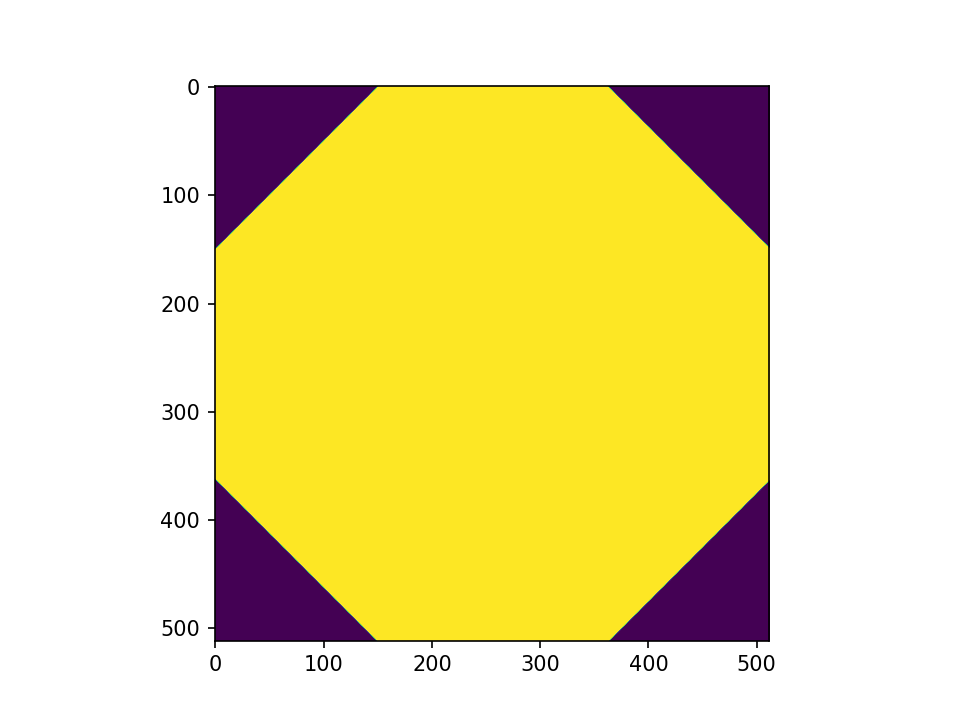

In [31]:
ish = (512, 512)
ix, iy = np.indices(ish)
sx, sy = ish[vector.ix] // 2, ish[vector.iy] // 2
sr = np.sqrt(sx * sx + sy * sy)
ix, iy = ix - sx, iy - sy
# ix, iy = ix / sx, iy / sy
# ir = np.exp(-np.power(ix * ix + iy * iy, 10))
ir = np.ones_like(ix)
ir[iy > ix + sr] = 0
ir[iy < ix - sr] = 0
ir[iy > -ix + sr] = 0
ir[iy < -ix - sr] = 0

plt.figure()
plt.imshow(ir)

<IPython.core.display.Javascript object>


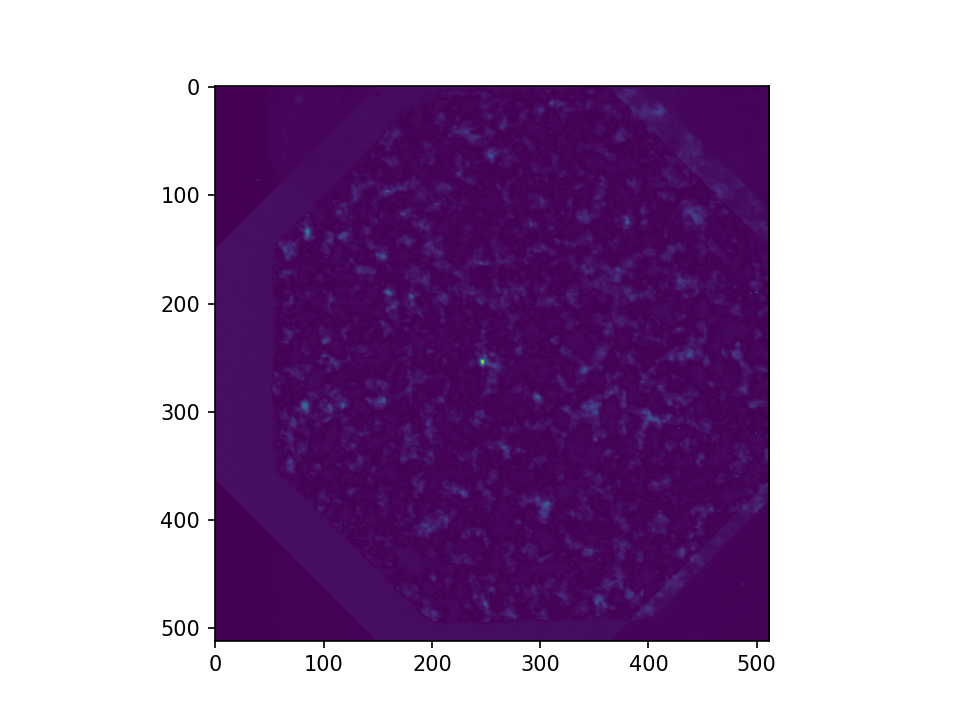

In [32]:
plt.figure()
plt.imshow(np.abs(new_cube[0, ~0] / new_cube[0, ~0].mean() - ir))